In [1]:
import numpy as np

from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import cluster

from scipy import stats
import pickle
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

import numpy as np  # a conventional alias
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib.pyplot import *
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing

from gensim import models
import gensim
from gensim import corpora
from gensim.models import TfidfModel
from gensim.models import LsiModel
from gensim.similarities import MatrixSimilarity
from gensim.models import Word2Vec

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from IPython.display import display
from time import time
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib notebook

In [2]:
df = pd.read_csv('data/windowbin/csv/all_dynamic_topic.csv')

# display(df)
index = df.iloc[:,2:3].values
display(index)
df.drop(df.columns[[0,1,2,3]], axis=1, inplace=True)

display(df.head())


# df1 = df.apply(lambda row: row.astype(str).str.contains('iran').any(), axis=1)
# display(df[df.apply(lambda row: row.astype(str).str.contains('iran').any(), axis=1)])

array([['tf_idf_tokenized_window_2012_11_01 '],
       ['tf_idf_tokenized_window_2012_11_02 '],
       ['tf_idf_tokenized_window_2012_11_03 '],
       ..., 
       ['tf_idf_tokenized_window_2012_09_48 '],
       ['tf_idf_tokenized_window_2012_09_49 '],
       ['tf_idf_tokenized_window_2012_09_50 ']], dtype=object)

2        3       4            5             6             7  \
0       fjs       id    type         href          name         rferl   
1     syria      say  turkey        assad    opposition        rebels   
2  damascus  suburbs  regime        daraa        fierce  neighborhood   
3      gaza  israeli   hamas  palestinian  palestinians          arab   
4       com     http     www           in        killed          iraq   

            8            9       10        11       ...                    21  \
0    cssclass  link_button       2f  function       ...         createelement   
1     turkish        rebel   border       snc       ...                killed   
2     martyrs    artillery       al    aleppo       ...               clashes   
3  gaza_strip          say    egypt    rocket       ...                  will   
4        html        world  reuters  bombings       ...                  kill   

              22            23       24                25        26       27  \
0     parentnode  insertbefore   script            russia        3a  georgia   
1      coalition       foreign  patriot  president_bashar  fighting    month   
2  demonstration          area     hama             youtu  warplane    wound   
3             al     jerusalem    state          egyptian  tel_aviv       un   
4            car      breaking       ie             feeds  pakistan     2012   

                 28         29               30  
0  gulnara_karimova   document              hah  
1              army   activist           people  
2            mortar        due             free  
3          conflict  netanyahu        ceasefire  
4            google      wound  facebook_reddit  

[5 rows x 29 columns]

In [3]:
%%time 

corpus = df.values.tolist()
corpus_all  = []
for corpus_line in corpus:
    corpus_all.append(u' '.join(corpus_line))
    
    
# print(corpus_all[0])

vectorizer = CountVectorizer(max_df=0.5, min_df=5)
vectorizer = CountVectorizer(max_df=0.5)
X_tfidf = vectorizer.fit_transform(corpus_all)  # a sparse matrix

vocab = vectorizer.get_feature_names()  # a list

print(len(vocab))

print(X_tfidf.shape)

6782
(1546, 6782)
CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 51.2 ms


In [4]:
def load_w2v(word2vec_model_file):
    # load the finished model from disk
    word2vec_model = Word2Vec.load(word2vec_model_file)
    word2vec_model.init_sims(replace=True)
    return word2vec_model

In [5]:
word2vec_model_file = '/home/sonic/sonic/eosdb/data/eos/word2vec_model_all.model'
word2vec_model = load_w2v(word2vec_model_file)

In [6]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.vocab]
    return np.mean(word2vec_model[doc], axis=0) 

In [7]:
def document_to_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.vocab]
    return np.array(word2vec_model[doc])



In [8]:
%%time


topic_w2v = np.array([document_vector(word2vec_model, doc) for doc in corpus])

print(topic_w2v[0])

# n_components =20

# print("number of components: {}".format(n_components))
# X_reduced = TruncatedSVD(n_components=n_components, random_state=42).fit_transform(topic_w2v)

# print(X_reduced.shape)

X_embedded = TSNE(n_components=3, init='pca', verbose=2).fit_transform(topic_w2v)

[ 0.06067045 -0.09812079  0.0235839  -0.01275288 -0.08627913  0.02493458
 -0.04883189 -0.01905939 -0.06257327 -0.01454585 -0.12008841  0.06359842
  0.03643051 -0.04166025 -0.02546711 -0.04613073 -0.03202148 -0.01042189
  0.01579425  0.10471222  0.22395574  0.01965271  0.04066421  0.01696043
  0.00393287 -0.07176946  0.00401374 -0.07237962  0.05419164 -0.07672931
 -0.10839029  0.00104953  0.0164298   0.04257913  0.05880199  0.0978661
  0.08850417 -0.02389378 -0.0379369   0.0271407   0.030616   -0.03253991
 -0.01659082  0.01154727  0.06039348  0.01938977  0.04036989  0.04218944
 -0.00881241 -0.08053266  0.058744   -0.11520366  0.0507837   0.02555385
  0.00082209  0.07671946 -0.03024733 -0.1001621  -0.01359972 -0.02273321
  0.04115549  0.10106451 -0.03216256  0.03892633 -0.02094724 -0.06901827
  0.01037137 -0.01978529 -0.06931167  0.05152766 -0.01324239  0.01445215
  0.06735863  0.05988038 -0.03270921  0.06576723 -0.02089024  0.01395791
  0.07228401  0.01152013  0.01028773  0.1003728   0.

In [9]:
def kmeans(X):

    estimators = {
        '4': KMeans(n_clusters=4),
        '6': KMeans(n_clusters=6),
        '10': KMeans(n_clusters=10),
        '15': KMeans(n_clusters=15),
        '20': KMeans(n_clusters=20),
        '30': KMeans(n_clusters=30),
        '40': KMeans(n_clusters=40),
        '50': KMeans(n_clusters=50),
        '70': KMeans(n_clusters=70),  
        '80': KMeans(n_clusters=80), 
        '100': KMeans(n_clusters=100),
        '150': KMeans(n_clusters=150),
        '200': KMeans(n_clusters=200),
    } 

    fignum = 1
    minsil=-1
    bestlabels=[]

    for name, est in estimators.items():
        fig = plt.figure(fignum, figsize=(8, 8))
        plt.clf()
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

        plt.cla()
        est.fit(X)
        labels = est.labels_
        sil=silhouette_score(X, labels, metric='euclidean')
        print ("silhouette of " + name+"=" +str(sil))
        if sil>minsil:
            bestlabels=labels
            minsil=sil
            numOfCluster=name

        colormap = plt.cm.gist_ncar  # nipy_spectral, Set1,Paired
        colorst = [colormap(i) for i in np.linspace(0, 0.9, int(name))]
        colors=[]
        for i in labels:
            colors.append(colorst[i])

        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors)  #X[:,3] means all rows column=3 ''''''c=labels.astype(np.float)

        ax.w_xaxis.set_ticklabels([])
        ax.w_yaxis.set_ticklabels([])
        ax.w_zaxis.set_ticklabels([])
        ax.set_xlabel(name)
        fignum = fignum + 1

    plt.show()
    print ("min sil =" +str(minsil))

    return numOfCluster,bestlabels

<IPython.core.display.Javascript object>


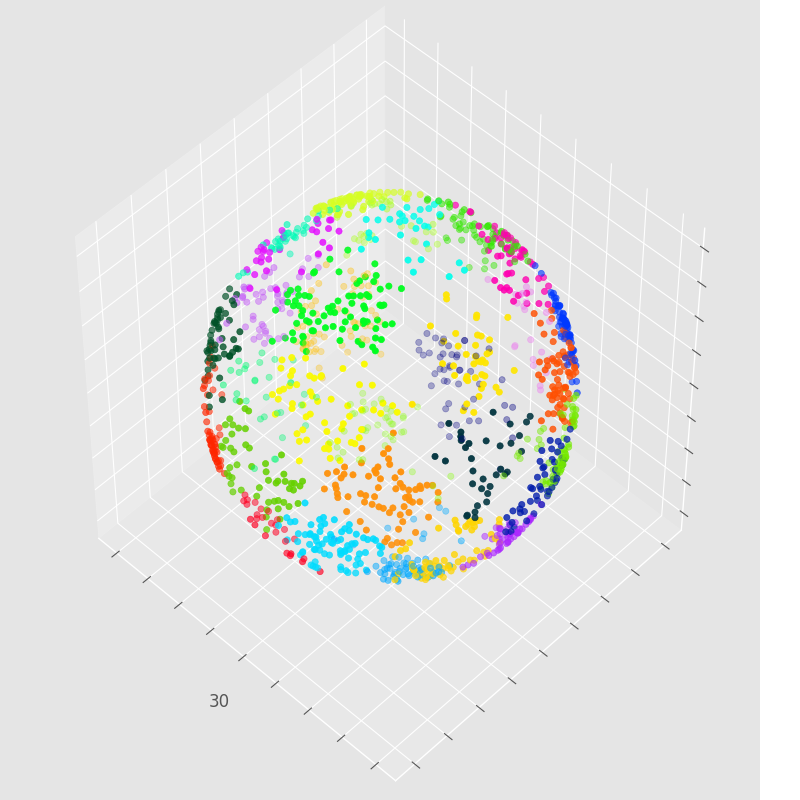

silhouette of 30=0.350364533413


<IPython.core.display.Javascript object>


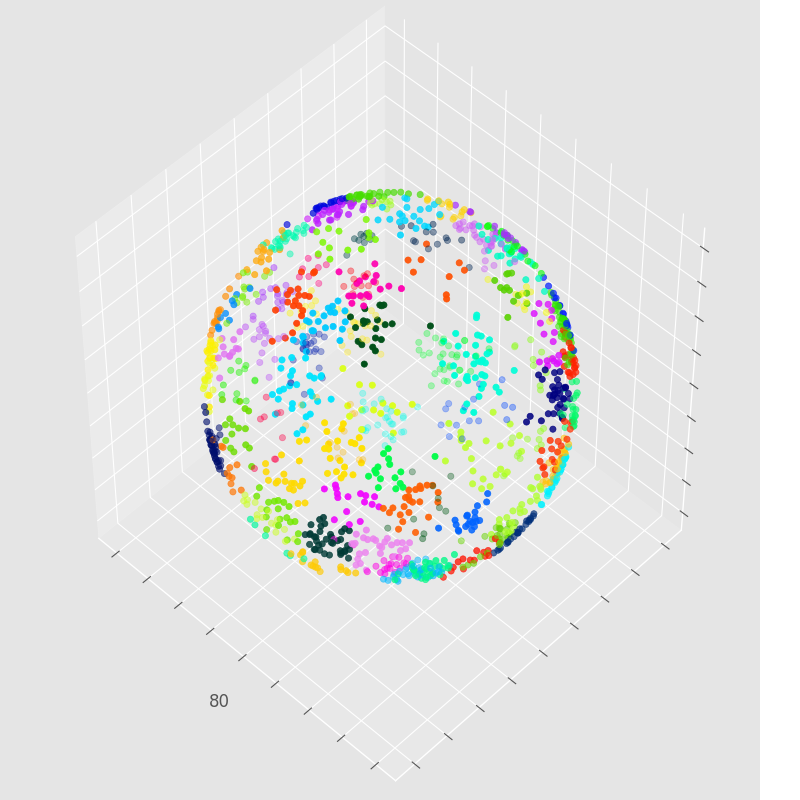

silhouette of 80=0.333338252978


<IPython.core.display.Javascript object>


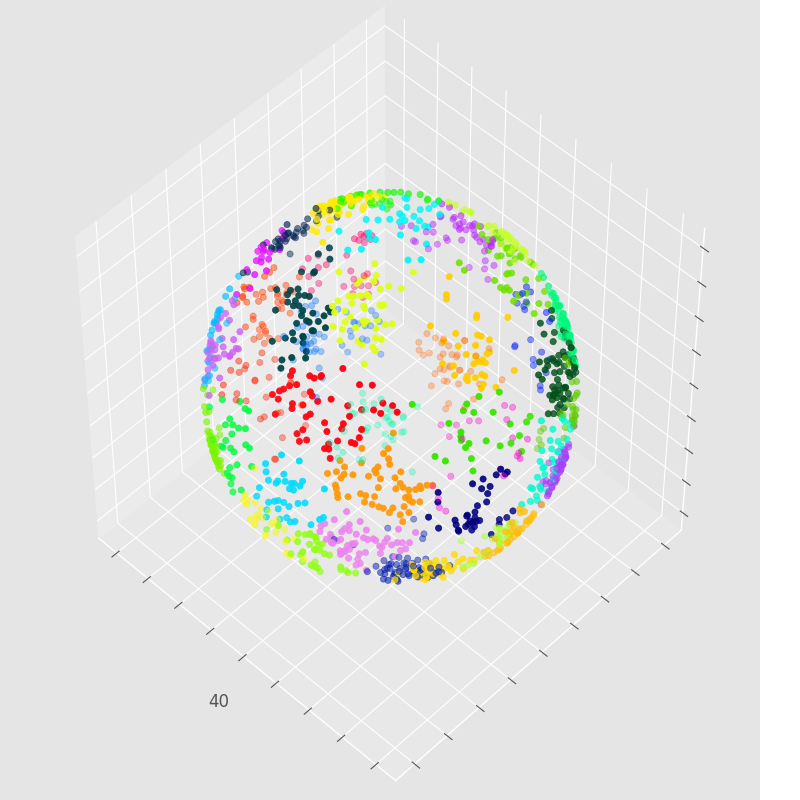

silhouette of 40=0.357357204118


<IPython.core.display.Javascript object>


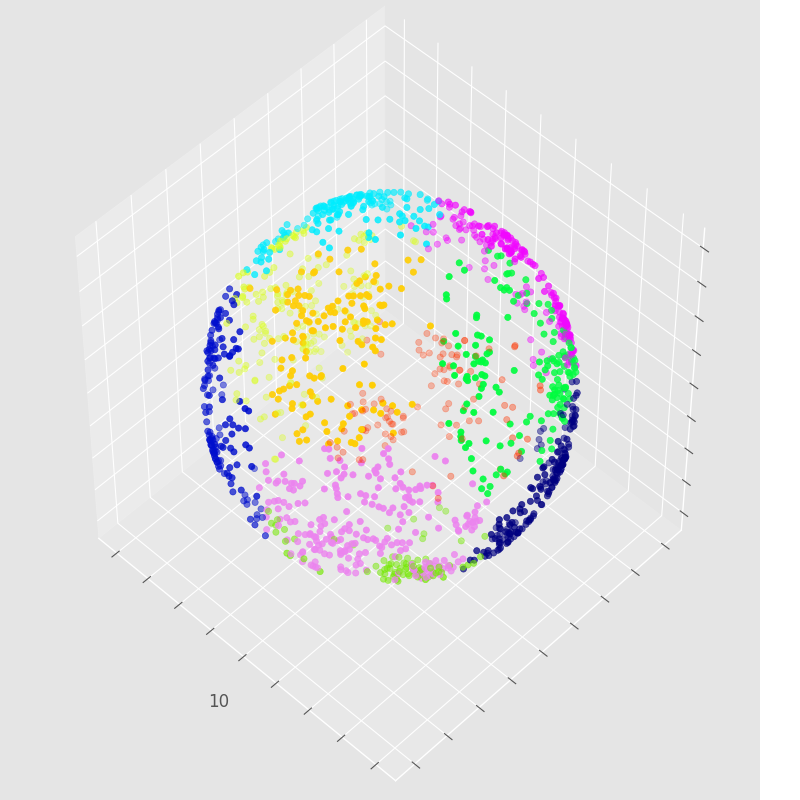

silhouette of 10=0.305849786055


<IPython.core.display.Javascript object>


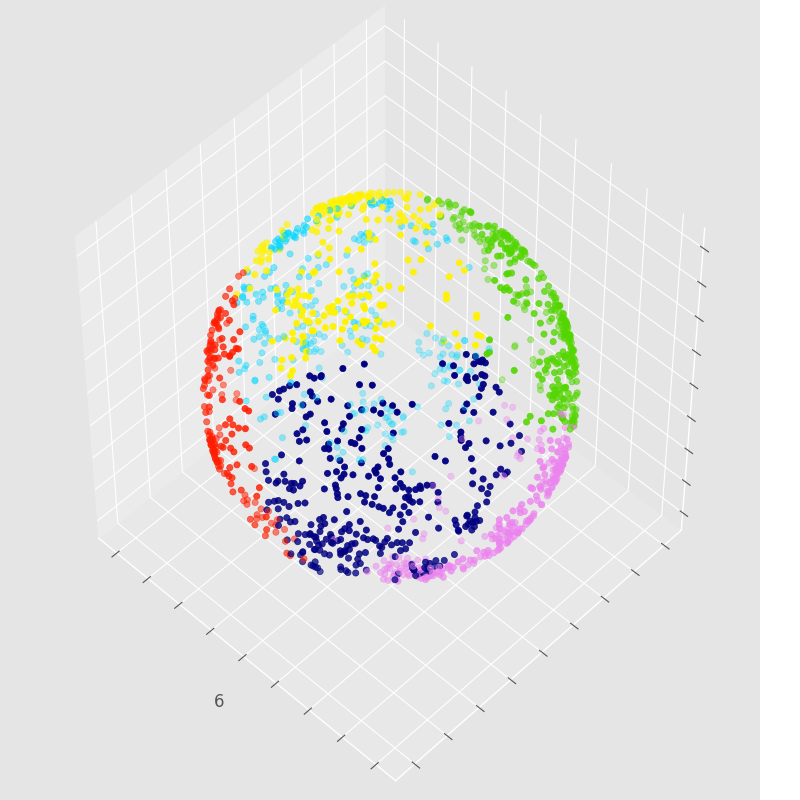

silhouette of 6=0.29079785581


<IPython.core.display.Javascript object>


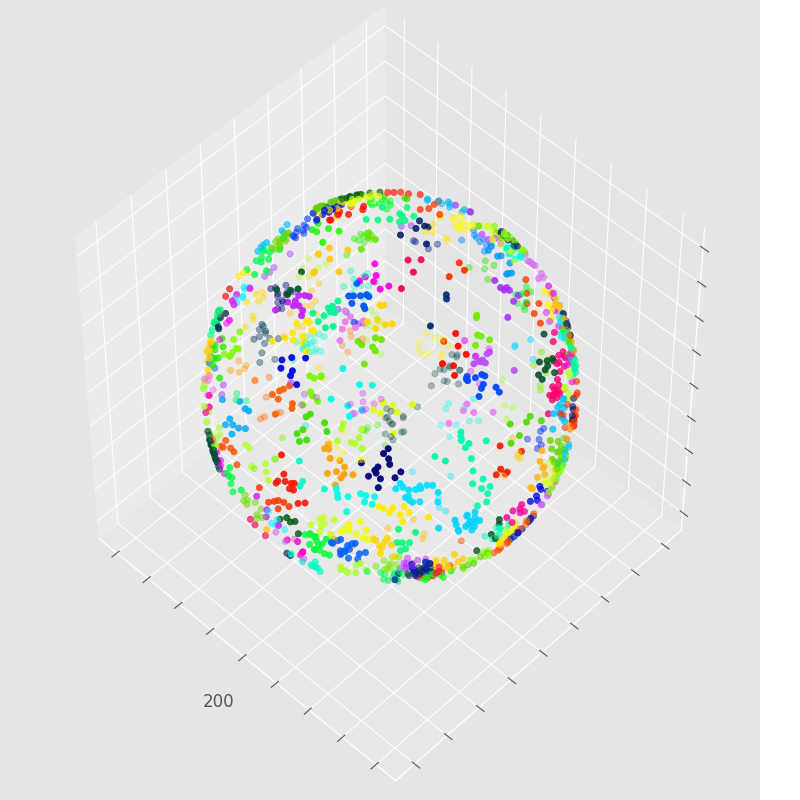

silhouette of 200=0.322633975241


<IPython.core.display.Javascript object>


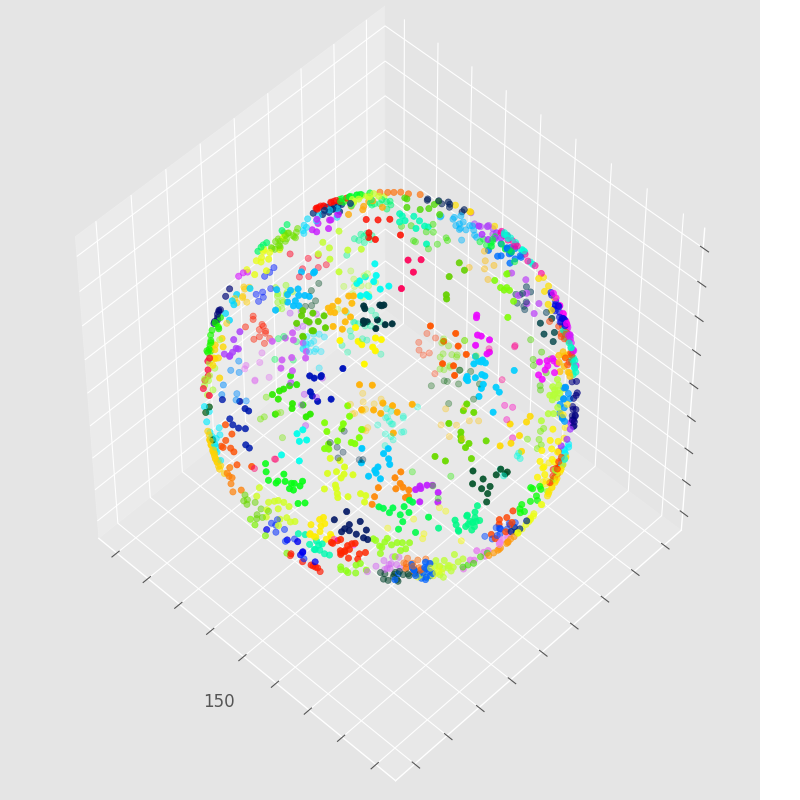

silhouette of 150=0.332045262518


<IPython.core.display.Javascript object>


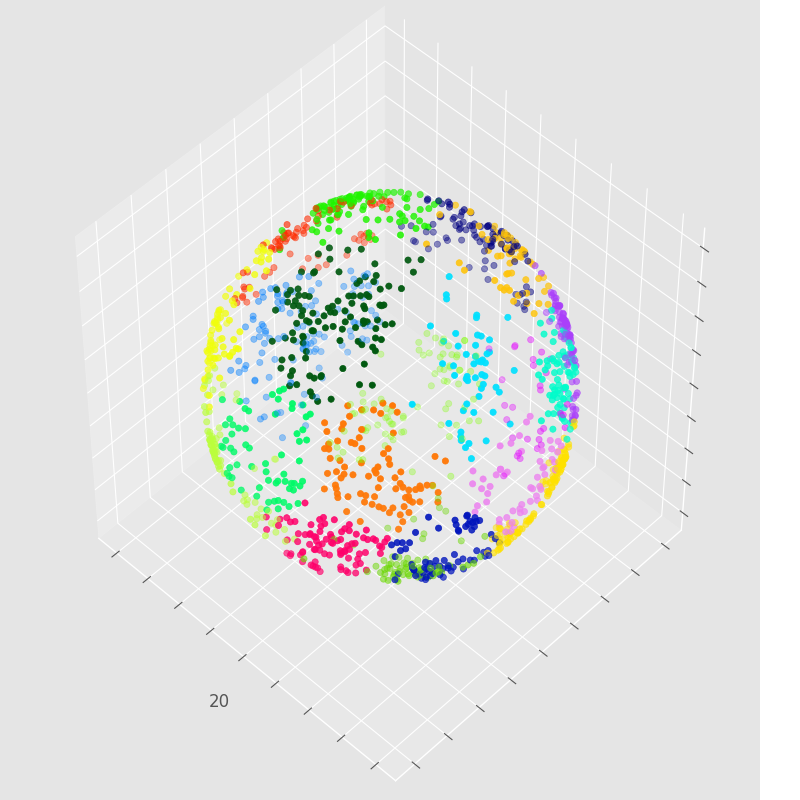

silhouette of 20=0.328322770173


<IPython.core.display.Javascript object>


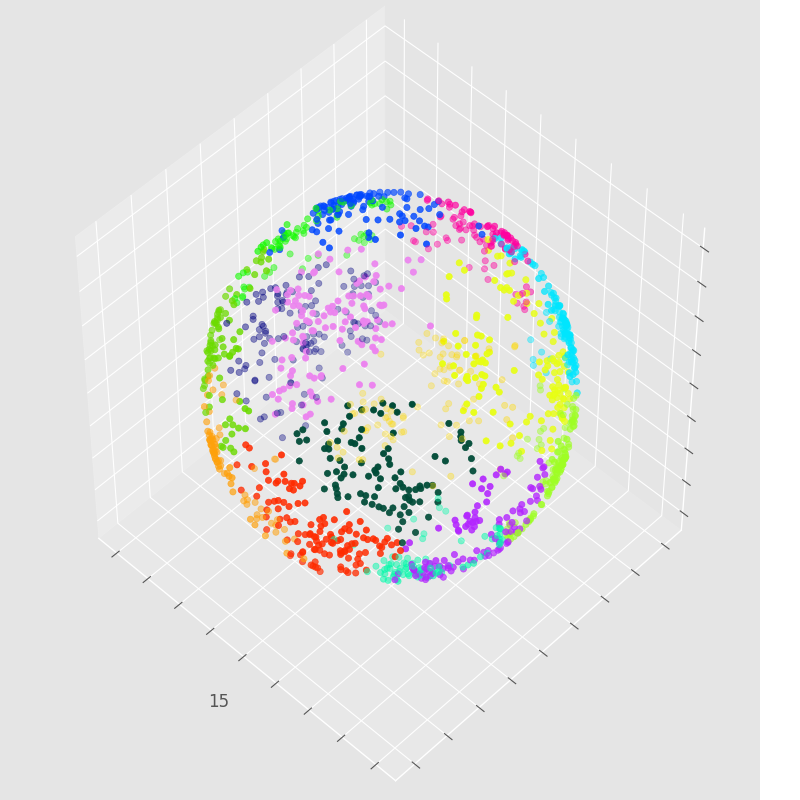

silhouette of 15=0.321032793074


<IPython.core.display.Javascript object>


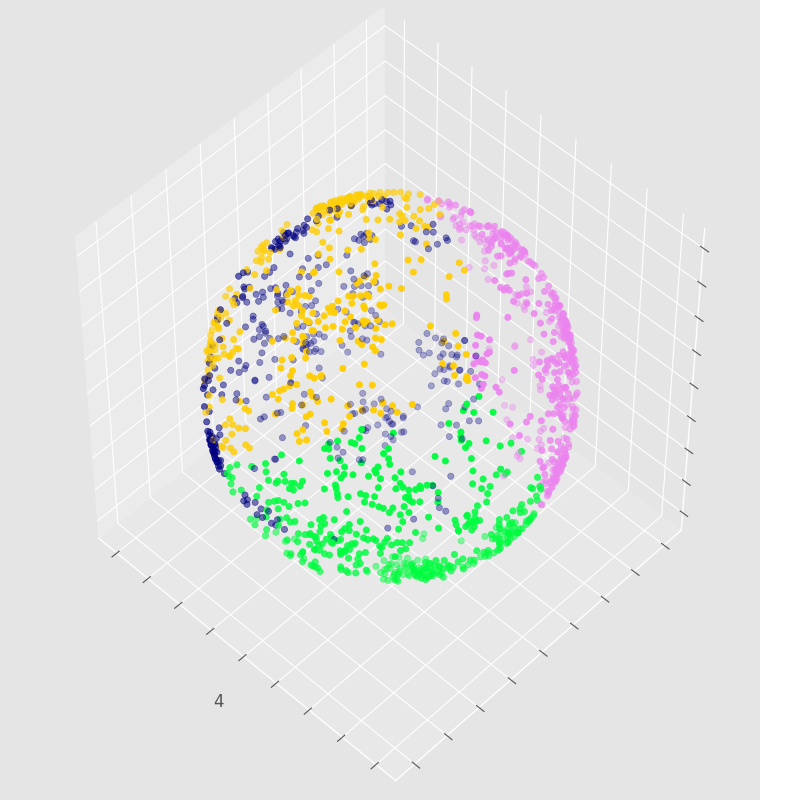

silhouette of 4=0.285628351057


<IPython.core.display.Javascript object>


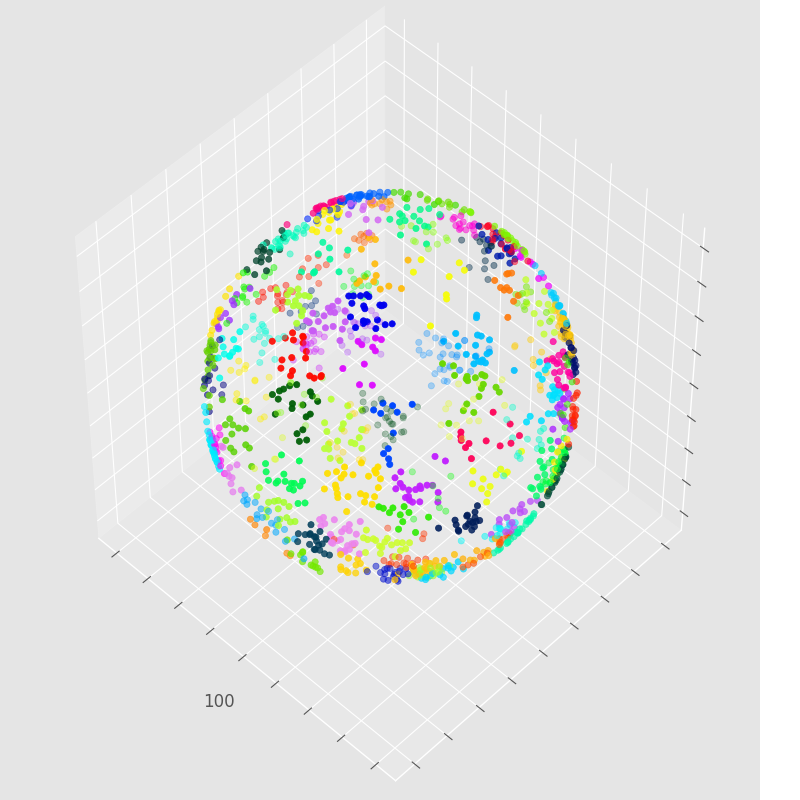

silhouette of 100=0.341593676543


<IPython.core.display.Javascript object>


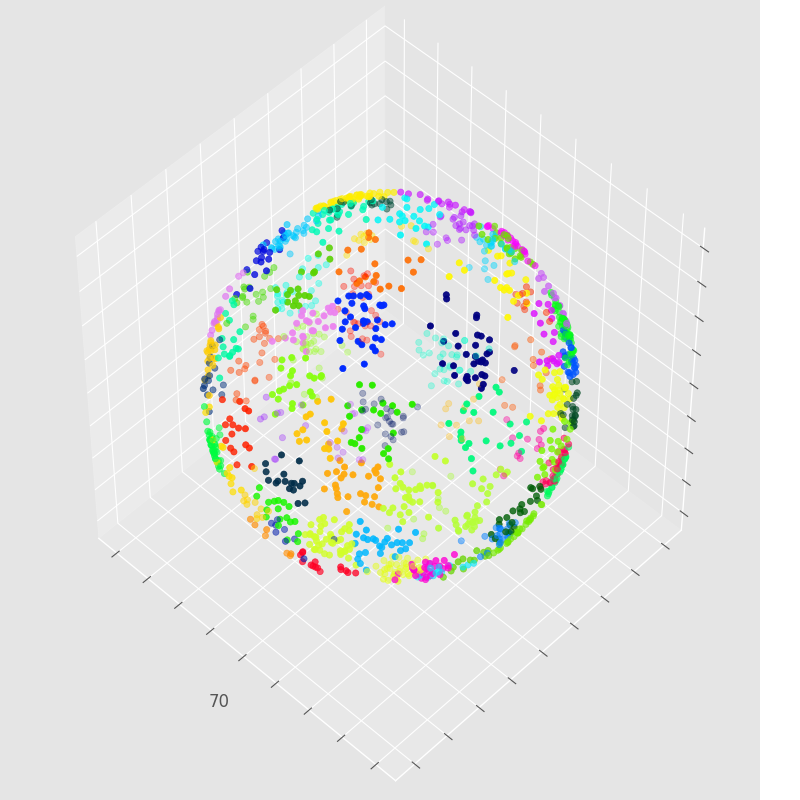

silhouette of 70=0.356309993783


<IPython.core.display.Javascript object>


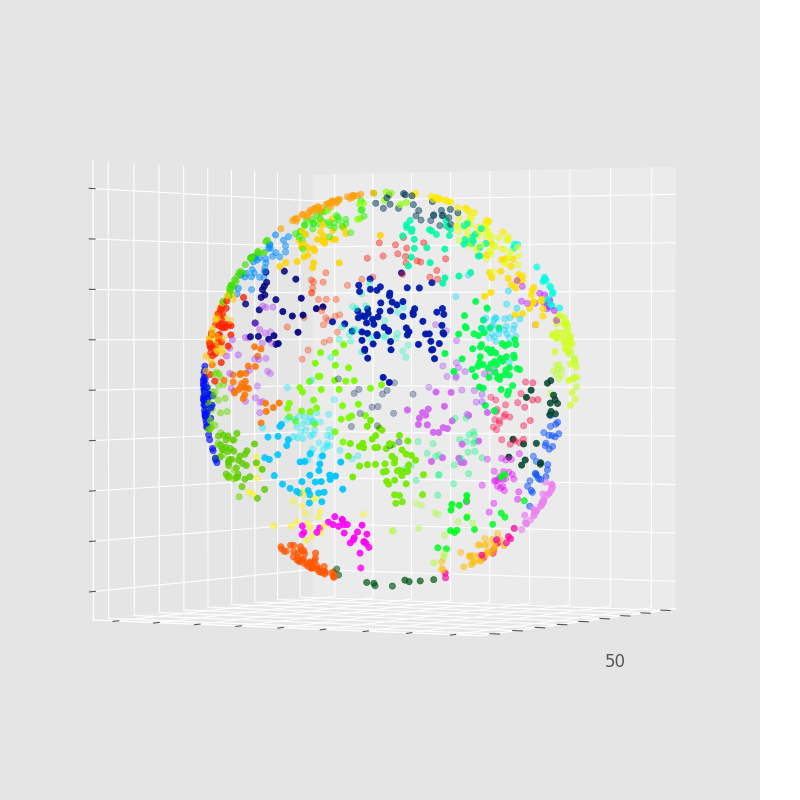

silhouette of 50=0.354781587546
min sil =0.357357204118


2        3       4            5             6             7  \
0       fjs       id    type         href          name         rferl   
1     syria      say  turkey        assad    opposition        rebels   
2  damascus  suburbs  regime        daraa        fierce  neighborhood   
3      gaza  israeli   hamas  palestinian  palestinians          arab   
4       com     http     www           in        killed          iraq   

            8            9       10        11   ...                22  \
0    cssclass  link_button       2f  function   ...        parentnode   
1     turkish        rebel   border       snc   ...         coalition   
2     martyrs    artillery       al    aleppo   ...     demonstration   
3  gaza_strip          say    egypt    rocket   ...                al   
4        html        world  reuters  bombings   ...               car   

             23       24                25        26       27  \
0  insertbefore   script            russia        3a  georgia   
1       foreign  patriot  president_bashar  fighting    month   
2          area     hama             youtu  warplane    wound   
3     jerusalem    state          egyptian  tel_aviv       un   
4      breaking       ie             feeds  pakistan     2012   

                 28         29               30 label_no  
0  gulnara_karimova   document              hah       21  
1              army   activist           people        9  
2            mortar        due             free        0  
3          conflict  netanyahu        ceasefire       11  
4            google      wound  facebook_reddit       34  

[5 rows x 30 columns]

CPU times: user 8.32 s, sys: 12.9 s, total: 21.2 s
Wall time: 6.37 s


In [10]:
%%time


# No scaling
numofClusters, bestlabels = kmeans(X_embedded)
df['label_no'] = bestlabels
display(df.head())

In [11]:
%%time


# Scaled
X_embedded_scaled = preprocessing.scale(X_embedded)
numofClusters, bestlabels = kmeans(X_embedded_scaled)
df['label_scale'] = bestlabels
display(df.head())

silhouette of 30=0.348186263099
silhouette of 80=0.344788812057
silhouette of 40=0.359930813204
silhouette of 10=0.305009338632
silhouette of 6=0.293622155111
silhouette of 200=0.321022331863
silhouette of 150=0.318014433846
silhouette of 20=0.330637858398
silhouette of 15=0.316822675506
silhouette of 4=0.287197783172
silhouette of 100=0.337055222491
silhouette of 70=0.347563850243
silhouette of 50=0.360140554223
min sil =0.360140554223


2        3       4            5             6             7  \
0       fjs       id    type         href          name         rferl   
1     syria      say  turkey        assad    opposition        rebels   
2  damascus  suburbs  regime        daraa        fierce  neighborhood   
3      gaza  israeli   hamas  palestinian  palestinians          arab   
4       com     http     www           in        killed          iraq   

            8            9       10        11     ...                23  \
0    cssclass  link_button       2f  function     ...      insertbefore   
1     turkish        rebel   border       snc     ...           foreign   
2     martyrs    artillery       al    aleppo     ...              area   
3  gaza_strip          say    egypt    rocket     ...         jerusalem   
4        html        world  reuters  bombings     ...          breaking   

        24                25        26       27                28         29  \
0   script            russia        3a  georgia  gulnara_karimova   document   
1  patriot  president_bashar  fighting    month              army   activist   
2     hama             youtu  warplane    wound            mortar        due   
3    state          egyptian  tel_aviv       un          conflict  netanyahu   
4       ie             feeds  pakistan     2012            google      wound   

                30 label_no label_scale  
0              hah       21          16  
1           people        9          29  
2             free        0           9  
3        ceasefire       11           6  
4  facebook_reddit       34          37  

[5 rows x 31 columns]

CPU times: user 8.68 s, sys: 12.5 s, total: 21.2 s
Wall time: 6.7 s


In [12]:
%%time


# Normalized 
X_normalized = preprocessing.normalize(X_embedded, norm='l2')
numofClusters, bestlabels = kmeans(X_normalized)
df['label_normalize'] = bestlabels
display(df.head())

silhouette of 30=0.413440176096
silhouette of 80=0.400112656691
silhouette of 40=0.413651873388
silhouette of 10=0.382004435493
silhouette of 6=0.352023748157
silhouette of 200=0.369725394343
silhouette of 150=0.37831977213
silhouette of 20=0.405033198463
silhouette of 15=0.380648674422
silhouette of 4=0.333564232159
silhouette of 100=0.382430099248
silhouette of 70=0.39851678558
silhouette of 50=0.419110038973
min sil =0.419110038973


2        3       4            5             6             7  \
0       fjs       id    type         href          name         rferl   
1     syria      say  turkey        assad    opposition        rebels   
2  damascus  suburbs  regime        daraa        fierce  neighborhood   
3      gaza  israeli   hamas  palestinian  palestinians          arab   
4       com     http     www           in        killed          iraq   

            8            9       10        11       ...             24  \
0    cssclass  link_button       2f  function       ...         script   
1     turkish        rebel   border       snc       ...        patriot   
2     martyrs    artillery       al    aleppo       ...           hama   
3  gaza_strip          say    egypt    rocket       ...          state   
4        html        world  reuters  bombings       ...             ie   

                 25        26       27                28         29  \
0            russia        3a  georgia  gulnara_karimova   document   
1  president_bashar  fighting    month              army   activist   
2             youtu  warplane    wound            mortar        due   
3          egyptian  tel_aviv       un          conflict  netanyahu   
4             feeds  pakistan     2012            google      wound   

                30 label_no label_scale label_normalize  
0              hah       21          16              41  
1           people        9          29              39  
2             free        0           9              22  
3        ceasefire       11           6              37  
4  facebook_reddit       34          37              44  

[5 rows x 32 columns]

CPU times: user 8.28 s, sys: 12.1 s, total: 20.3 s
Wall time: 6.36 s


In [15]:
df.to_csv('data/windowbin/csv/result_all_dynamic_topic.csv')